**Importación de librerías necesarias**


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO
from joblib import dump, load



**Preproceso**

Montar drive para la carga de datos

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


Importación de los datos del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bikes.csv")

Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247.000000
725,2012-12-28,5.545775,54.242931,14.792709,644.000000
726,2012-12-29,4.924888,54.010283,14.777848,575.666667
727,2012-12-30,4.304001,53.777635,14.762987,507.333333


Tipos de datos del df

In [ ]:
df.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

Conversion de date(object) a date

In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.dtypes

date           datetime64[ns]
temperature           float64
humidity              float64
windspeed             float64
count                 float64
dtype: object

Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
df.describe()

,temperature,humidity,windspeed,count
count,729.000000,729.000000,729.000000,729.000000
mean,17.762024,56.514591,17.241418,622.818930
std,8.921313,7.348730,5.222353,383.958772
min,-2.200000,21.300000,5.300000,2.000000
25%,10.066578,51.561669,13.462096,256.333333
50%,18.087694,56.546144,16.656522,639.000000
75%,25.455587,61.423987,20.320807,891.666667
max,35.100000,75.600000,35.200000,1820.000000


Mostrar un mapa de calor que indique la correlación entre vriables

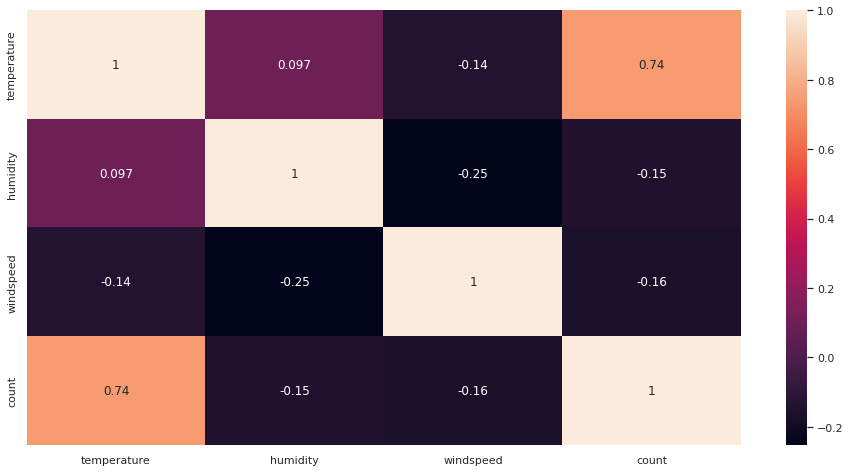

In [ ]:
sns.set()

# para definir el tamaño de cada dato
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),annot = True)

Seleccionar las características a tener en cuenta en el estudio

In [ ]:
df_filtrado  = pd.DataFrame()
df_filtrado = df[['temperature','humidity','windspeed','count']].copy()
                  
df_filtrado
# df_filtrado.plot()

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...
724,5.587201,57.755931,28.678187,247.000000
725,5.545775,54.242931,14.792709,644.000000
726,4.924888,54.010283,14.777848,575.666667
727,4.304001,53.777635,14.762987,507.333333


Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
# x_bike = df_filtrado.drop('count',axis = 1)
# y_bike = df_filtrado['count']



Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

In [ ]:
train_bike = df_filtrado.iloc[:583]
test_bike = df_filtrado.iloc[584:]

# train
x_train = train_bike[['temperature','humidity','windspeed']]
y_train = train_bike['count']

# test
x_test = test_bike[['temperature','humidity','windspeed']]
y_test = test_bike['count']



---


**AQUI COMIENZA LO DE ARBOLES**

---



**Entrenamiento y predicción**

Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar el modelo

In [ ]:
# instanciacion

# a diferencia de los otros, este de regresion
arbol = DecisionTreeRegressor(criterion = 'absolute_error',max_depth=3)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

Realizar una predicción con los datos de prueba

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

In [ ]:
y_predict

array([751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 921.        ,
       751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       921.        , 921.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       478.5       , 751.        , 751.        , 751.        ,
       751.        , 751.        , 921.        , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 478.5       , 751.        ,
       751.        , 751.        , 751.        , 751.        ,
       751.        , 751.        , 751.        , 921.  

Mostrar el árbol de decisión resultante

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[0] <= 14.266\\nabsolute_error = 321.29\\nsamples = 583\\nvalue = 606.0"] ;\n1 [label="X[0] <= 5.015\\nabsolute_error = 120.607\\nsamples = 221\\nvalue = 191.0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 2.347\\nabsolute_error = 40.569\\nsamples = 51\\nvalue = 82.333"] ;\n1 -> 2 ;\n3 [label="absolute_error = 20.29\\nsamples = 21\\nvalue = 54.0"] ;\n2 -> 3 ;\n4 [label="absolute_error = 44.819\\nsamples = 30\\nvalue = 111.5"] ;\n2 -> 4 ;\n5 [label="X[0] <= 12.327\\nabsolute_error = 118.039\\nsamples = 170\\nvalue = 231.333"] ;\n1 -> 5 ;\n6 [label="absolute_error = 81.333\\nsamples = 128\\nvalue = 217.667"] ;\n5 -> 6 ;\n7 [label="absolute_error = 193.625\\nsamples = 42\\nvalue = 375.833"] ;\n5 -> 7 ;\n8 [label="X[1] <= 68.513\\nabsolute_error = 219.969\\nsamples = 362\\nvalue = 773.5"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"

Mostrar la importancia de cada atributo en el árbol resultante

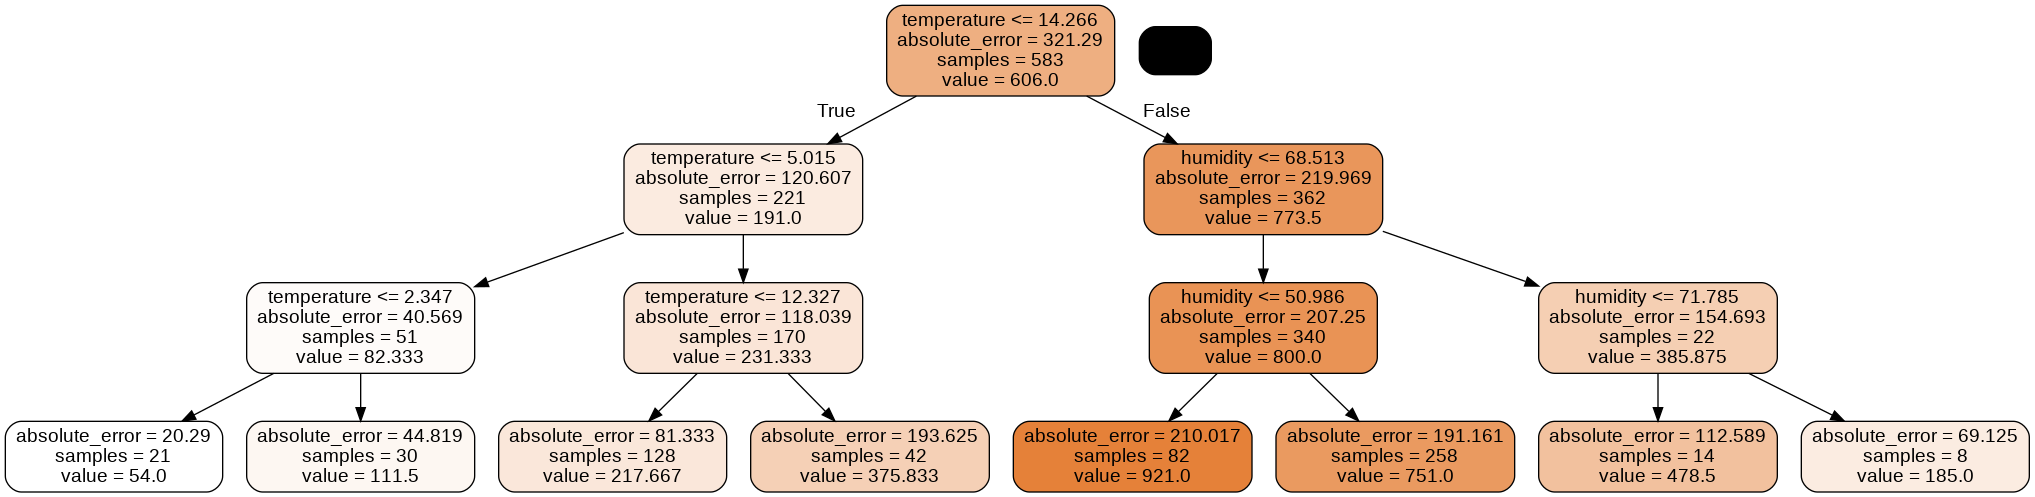

In [ ]:
from pandas._libs.tslibs import dtypes
dot_data = StringIO()

# regresor no tiene

# arbol_classes = []
# arbol_classes
# for i in arbol.classes_:
#   i = str(i)
#   arbol_classes.append(i)

tree.export_graphviz(arbol, out_file = dot_data, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


Intenta guardar el modelo de predicción ya entrenado usando dump (https://scikitlearn.org/stable/modules/model_persistence.html)

In [ ]:
dump(arbol, 'arbol.joblib')

['arbol.joblib']

In [ ]:
arbol2 = load('arbol.joblib') 

In [ ]:
arbol2

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

Evaluación

Mostrar el error cuadrático medio (mean_squared_error)
Mostrar el error absoluto medio (mean_absolute_error)

In [ ]:
# evaluacion
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_predict,y_test)
print(f"error cuadrático medio: {mean_squared_error}")


from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_predict,y_test)
print(f"error absoluto medio: {mean_absolute_error}")




error cuadrático medio: 111807.04281609195
error absoluto medio: 258.04942528735637


Representar gráficamente los valores predichos con los valores reales

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


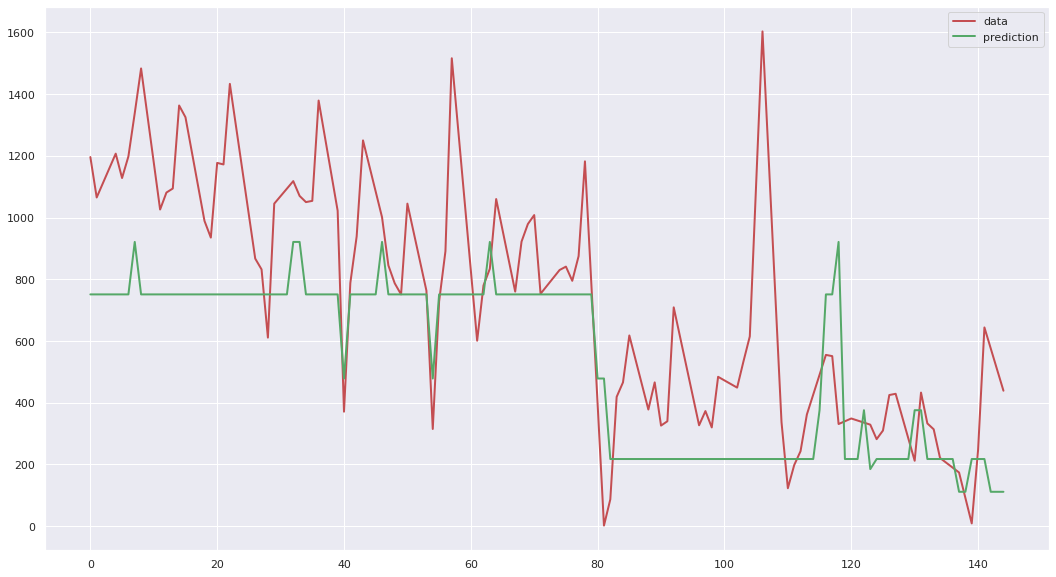

In [ ]:
import numpy as np


xx = np.stack(i for i in range(y_test.shape[0]))
plt.figure(figsize=(18,10))
plt.plot(xx, y_test, c='r', LineWidth = 2, label = 'data')
plt.plot(xx, y_predict, c='g', LineWidth = 2, label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

**Optimización de hiperparámetros**

Calcula la combinación de parámetros óptima (profundidad de árbol y criterio). Para ello realiza ejecuciones con cada uno de los valores del criterio para los valores de profundidad de árbol de 1 a 15.

In [ ]:
# instanciacion

criterions = ['squared_error','friedman_mse','absolute_error','poisson']
errores_absoluto = []
min_depths = 0
min_criterion = ""

for criterion in criterions:
  for max_depth in range(1,16):
    arbol = DecisionTreeRegressor(criterion = criterion,max_depth=max_depth)

    # entrenamiento
    arbol.fit(x_train,y_train)

    # prediccion
    y_predict = arbol.predict(x_test)

    from sklearn.metrics import mean_absolute_error
    mean_absolute_error = mean_absolute_error(y_predict,y_test)

    errores_absoluto.append(mean_absolute_error)

    if min(errores_absoluto) == mean_absolute_error:
      min_criterion = criterion
      min_depths = max_depth

    from sklearn.metrics import mean_absolute_error
    print(f"mean_absolute_error: {mean_absolute_error(y_test,y_predict)} con criterion como: {criterion} y con max_depths como: {max_depth}")

mean_absolute_error: 244.84838539250558 con criterion como: squared_error y con max_depths como: 1
mean_absolute_error: 231.11075421049694 con criterion como: squared_error y con max_depths como: 2
mean_absolute_error: 211.19551666617 con criterion como: squared_error y con max_depths como: 3
mean_absolute_error: 224.07015933095295 con criterion como: squared_error y con max_depths como: 4
mean_absolute_error: 222.23704474707088 con criterion como: squared_error y con max_depths como: 5
mean_absolute_error: 225.46356623203593 con criterion como: squared_error y con max_depths como: 6
mean_absolute_error: 224.21610396018914 con criterion como: squared_error y con max_depths como: 7
mean_absolute_error: 224.44688077200118 con criterion como: squared_error y con max_depths como: 8
mean_absolute_error: 234.88016694093946 con criterion como: squared_error y con max_depths como: 9
mean_absolute_error: 239.4823928063568 con criterion como: squared_error y con max_depths como: 10
mean_absolute

In [ ]:
print(f"El valor min de error absoluto es:{min(errores_absoluto)}, con k={min_criterion}, y w={min_depths}")

El valor min de error absoluto es:211.19551666617, con k=squared_error, y w=3


Finalmente los parámetros elegidos serán los que den mejor media de esas medidas
anteriormente nombradas

In [ ]:
# instanciacion

arbol = DecisionTreeRegressor(criterion = min_criterion,max_depth=min_depths)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

In [ ]:
y_predict

array([914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 657.51633987, 914.56797235,
       657.51633987, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       657.51633987, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 914.56797235, 723.33222222, 914.56797235,
       914.56797235, 914.56797235, 914.56797235, 914.56797235,
       914.56797235, 723.33222222, 657.51633987, 657.51633987,
       914.56797235, 914.56797235, 914.56797235, 723.33222222,
       723.33222222, 657.51633987, 723.33222222, 723.33

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[0] <= 14.38\\nsquared_error = 142864.536\\nsamples = 583\\nvalue = 590.617"] ;\n1 [label="X[0] <= 11.082\\nsquared_error = 39923.744\\nsamples = 223\\nvalue = 236.469"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 4.332\\nsquared_error = 11113.082\\nsamples = 161\\nvalue = 180.442"] ;\n1 -> 2 ;\n3 [label="squared_error = 1972.04\\nsamples = 47\\nvalue = 81.383"] ;\n2 -> 3 ;\n4 [label="squared_error = 9168.314\\nsamples = 114\\nvalue = 221.281"] ;\n2 -> 4 ;\n5 [label="X[1] <= 60.466\\nsquared_error = 85419.902\\nsamples = 62\\nvalue = 381.958"] ;\n1 -> 5 ;\n6 [label="squared_error = 123391.969\\nsamples = 33\\nvalue = 487.197"] ;\n5 -> 6 ;\n7 [label="squared_error = 15266.434\\nsamples = 29\\nvalue = 262.204"] ;\n5 -> 7 ;\n8 [label="X[1] <= 63.32\\nsquared_error = 80813.392\\nsamples = 360\\nvalue = 809.993"] ;\n0 -> 8 [labeldistance=2.5, labelangl

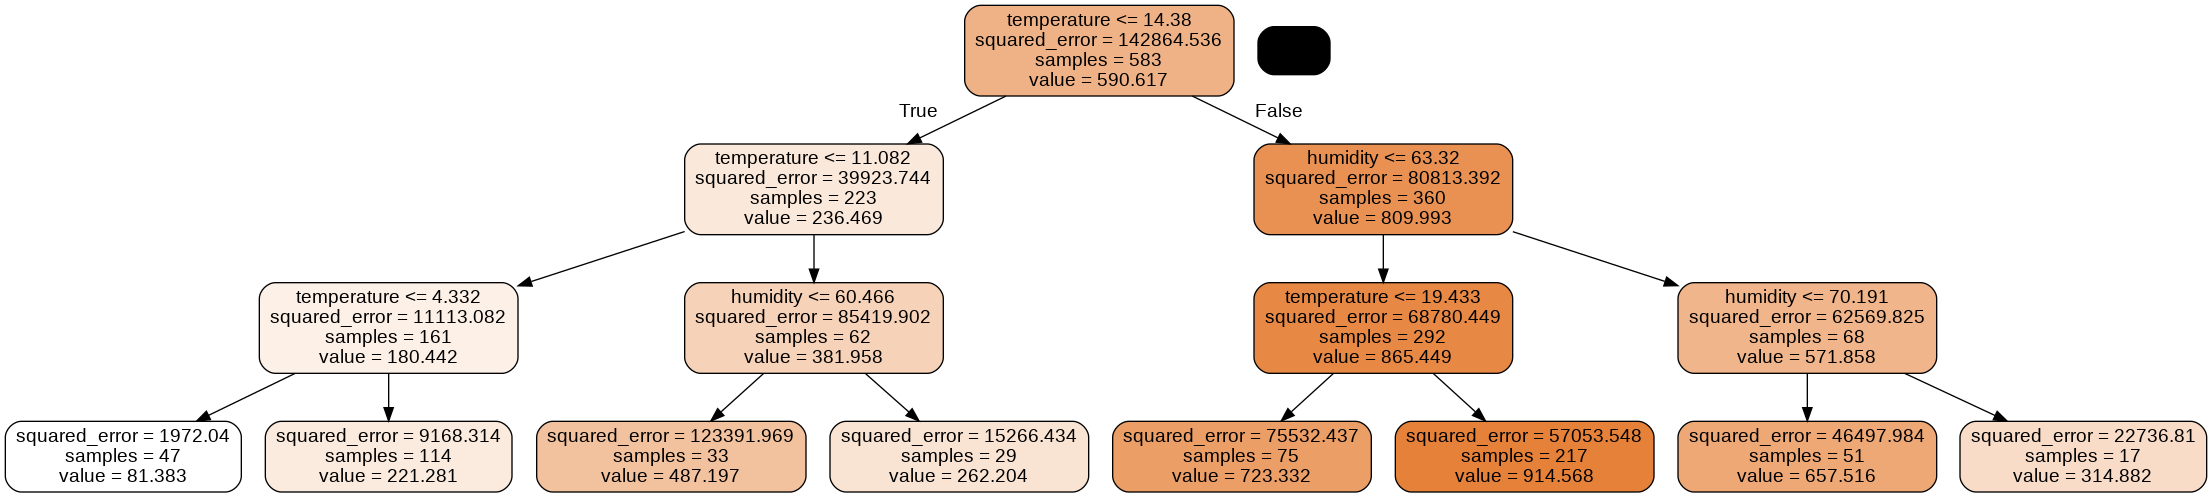

In [ ]:
dot_data = StringIO()

tree.export_graphviz(arbol, out_file = dot_data, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Mostrar el error cuadrático medio (mean_squared_error) Mostrar el error absoluto medio (mean_absolute_error)

In [ ]:
# evaluacion
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_predict,y_test)
print(f"error cuadrático medio: {mean_squared_error}")


from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_predict,y_test)
print(f"error absoluto medio: {mean_absolute_error}")



error cuadrático medio: 75452.53632722265
error absoluto medio: 211.19551666617


Representar gráficamente los valores predichos con los valores reales

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


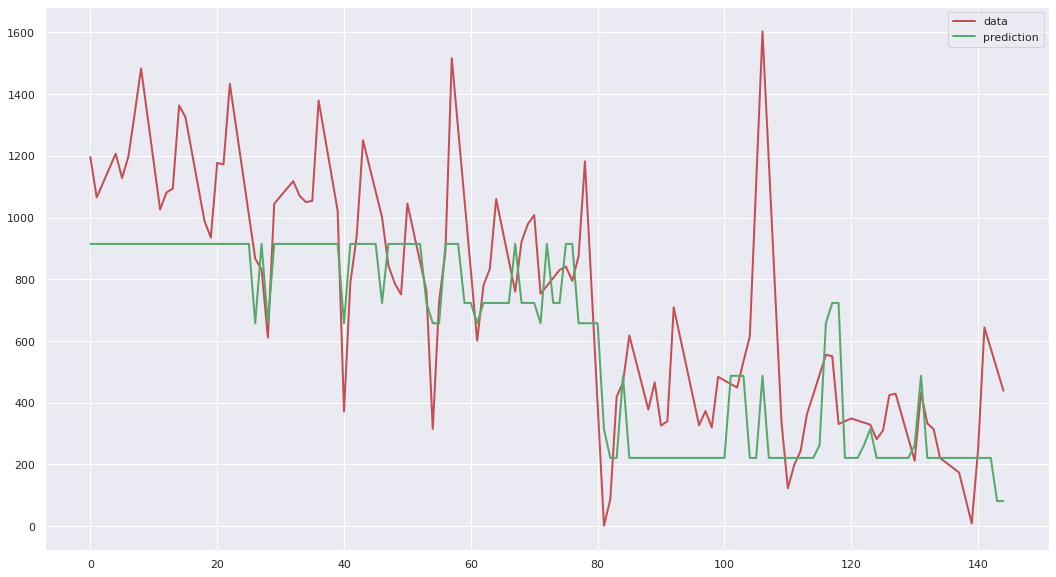

In [ ]:
import numpy as np


xx = np.stack(i for i in range(y_test.shape[0]))
plt.figure(figsize=(18,10))
plt.plot(xx, y_test, c='r', LineWidth = 2, label = 'data')
plt.plot(xx, y_predict, c='g', LineWidth = 2, label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()